In [57]:
#her finder jeg peaksne og sådan....


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import os

# Directory containing the BallIncline files
directory_path = '../Ball_data/'

# Loop over all files in the directory
# Initialize lists to store results for each dataset
all_peak_centers = []
all_peak_starts = []
all_significant_peaks = []

# Separate data from files with 'rot' in the name
rot_peak_centers = []
rot_peak_starts = []
rot_significant_peaks = []

peak_centers = []
peak_starts = []
significant_peaks = []

for file_name in os.listdir(directory_path):
    if file_name.startswith('BallIncline') and file_name.endswith('.csv'):
        file_path = os.path.join(directory_path, file_name)
        
        # Load the data
        data = pd.read_csv(file_path, header=16, delimiter=',')
        data.columns = ['x', 'y']  # Assuming two columns: x (time/position) and y (voltage)

        # Find all peaks in the data
        peaks, _ = find_peaks(data['y'], height=0)

        # Sort peaks by their prominence (height) in descending order
        sorted_peaks = sorted(peaks, key=lambda p: data['y'][p], reverse=True)

        # Select the top 5 significant peaks
        significant_peaks = sorted_peaks[:5]
        # Store the x-values of the significant peaks for further processing
        centers = data['x'].iloc[significant_peaks].values

        # Find the starting x-values of each significant peak
        def find_peak_starts(data, significant_peaks, threshold=0.19):
            """
            Find the starting x-values of each significant peak based on a threshold.
            
            Parameters:
            - data: pandas DataFrame containing 'x' and 'y' columns.
            - significant_peaks: list of indices of significant peaks.
            - threshold: float, the fraction of the peak height to determine the start.
            
            Returns:
            - List of x-values where each peak starts.
            """
            peak_starts = []
            for peak in significant_peaks:
                peak_height = data['y'].iloc[peak]
                start_index = peak
                # Traverse backward to find the point where the signal drops below the threshold
                while start_index > 0 and data['y'].iloc[start_index] > threshold * peak_height:
                    start_index -= 1
                peak_starts.append(data['x'].iloc[start_index])
            return peak_starts

        peak_starts = find_peak_starts(data, significant_peaks)

        # Check if the file name contains 'rot'
        if 'rot' in file_name:
            rot_peak_centers.append(centers)
            rot_peak_starts.append(peak_starts)
            rot_significant_peaks.append(significant_peaks)
        else:
            peak_centers.append(centers)
            peak_starts.append(peak_starts)
            significant_peaks.append(significant_peaks)

        # Print the file name and the starting x-values of the peaks
        print(f"File: {file_name}")

File: BallIncline_rot_1.csv
File: BallIncline_rot_2.csv
File: BallIncline_rot_3.csv
File: BallIncline_rot_7.csv
File: BallIncline_rot_6.csv
File: BallIncline_rot_4.csv
File: BallIncline_rot_5.csv
File: BallIncline_rot_10.csv
File: BallIncline_2.csv
File: BallIncline_3.csv
File: BallIncline_10.csv
File: BallIncline_1.csv
File: BallIncline_4.csv
File: BallIncline_5.csv
File: BallIncline_7.csv
File: BallIncline_6.csv
File: BallIncline_8.csv
File: BallIncline_9.csv
File: BallIncline_rot_8.csv
File: BallIncline_rot_9.csv


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

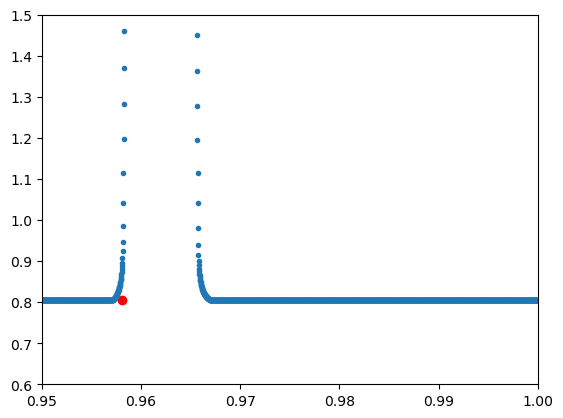

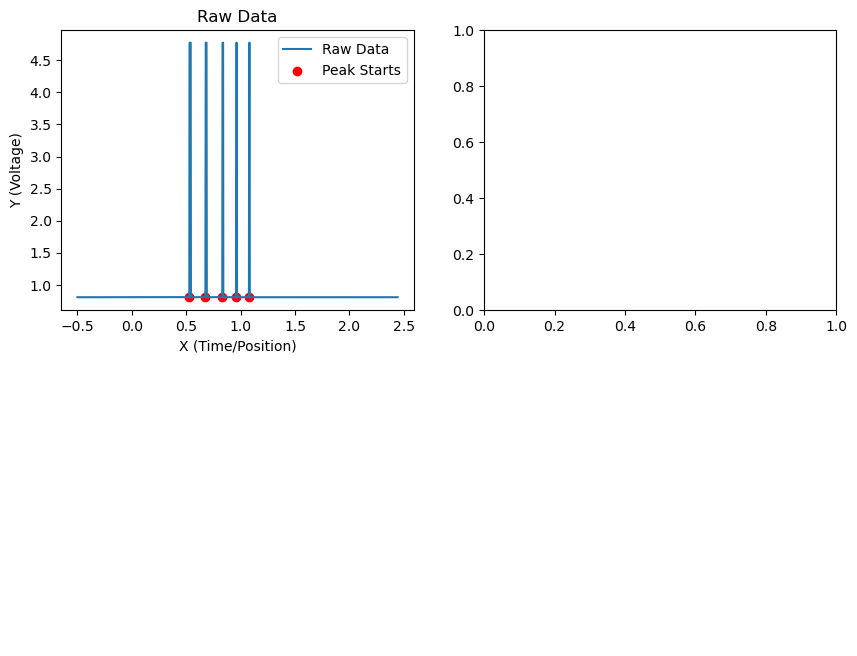

In [ ]:

plt.plot(data['x'], data['y'], '.', label='Raw Data')
plt.scatter(peak_starts, [data['y'].iloc[peaks[i]] for i in range(len(peak_starts))], 
                  color='red', label='Peak Starts')
plt.xlim(0.95, 1)
plt.ylim(0.6, 1.5)


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot raw data in the first subplot
axs[0, 0].plot(data['x'], data['y'], label='Raw Data')
axs[0, 0].set_xlabel('X (Time/Position)')
axs[0, 0].set_ylabel('Y (Voltage)')
axs[0, 0].set_title('Raw Data')
#

# Plot dots where each peak begins
axs[0, 0].scatter(peak_starts, [data['y'].iloc[peaks[i]] for i in range(len(peak_starts))], 
                  color='red', label='Peak Starts')
axs[0, 0].legend()

#axs[0, 1].legend()
axs[1, 0].axis('off')
axs[1, 1].axis('off')

In [69]:
#vinkler og deres usikkerheder
theta0_measurements = np.array([14.05, 14.1, 14.1, 14.1])*np.pi/180
theta0 = np.mean(theta0_measurements)
theta0_std = np.std(theta0_measurements)

theta180_measurements = np.array([13.7, 13.9, 13.75, 14])*np.pi/180
theta180 = np.mean(theta180_measurements)
theta180_std = np.std(theta180_measurements)

#finder relative afsteande mellem sensorer 
sensor_x = np.array([0, 11.37, 26.39, 41.23, 57.02, ])/100
sensor_std = np.array([0.5, 0.07, 0.04, 0.04, 0.05])/100
relative_distance_errors = [] 

for i in (1, 2, 3, 4):
    error = np.sqrt(sensor_std[i]**2 + sensor_std[i-1]**2)
    relative_distance_errors.append(error)

relative_distances = np.diff(sensor_x)
relative_distance_errors = np.array(relative_distance_errors)

print("Relative Distances:", relative_distances)
print("Relative Errors:", relative_distance_errors)

Relative Distances: [0.1137 0.1502 0.1484 0.1579]
Relative Errors: [0.00504876 0.00080623 0.00056569 0.00064031]


In [ ]:
#finder accelleration og g

g_values = []
g_errors = []

time_intervals = np.diff(peak_starts)

v = relative_distances / time_intervals
dv = np.diff(v)

accelerations = dv / time_intervals[1:] 

for acc in accelerations:
    g = acc / np.sin(theta0)
    g_values.append(g)

print("Calculated g values:", [float(g) for g in g_values])

# Print the calculated accelerations as numbers
print("Calculated Accelerations:", [float(acc) for acc in accelerations])

Calculated g values: [5.235994380015755, 6.663871490461577, 5.535817741421053]
Calculated Accelerations: [1.274458901184461, 1.6220090628406219, 1.3474369305697558]



## Hmmm rotational energy..... måske derfor vi får for lav g


In [79]:
from scipy.optimize import curve_fit
import numpy as np

# Define the model function for energy
def energy_model(acceleration, mass):
    g = 9.81  # Gravitational acceleration in m/s^2
    radius = 0.01  # Radius of the ball in meters
    height = acceleration * 0.5  # Approximate height based on acceleration
    rotational_energy = (2 / 5) * mass * radius**2 * acceleration / radius
    potential_energy = mass * g * height
    return potential_energy + rotational_energy

# Example data: accelerations and measured energies
accelerations = np.array([6.76681554, 6.43997939, 7.90139064, 8.43739453])
measured_energies = np.array([0.27, 0.25, 0.31, 0.33])  # Replace with actual energy measurements

# Fit the model to the data
popt, pcov = curve_fit(energy_model, accelerations, measured_energies)

# Extract the fitted mass and its uncertainty
fitted_mass = popt[0]
mass_uncertainty = np.sqrt(np.diag(pcov))[0]
print(f"Fitted mass: {fitted_mass:.6f} kg")

Fitted mass: 0.007997 kg


In [64]:
print(np.sin(np.deg(np.pi/2)))

AttributeError: module 'numpy' has no attribute 'deg'